In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/DATASET IOT"
path="/content/drive/MyDrive/DATASET IOT/data_209960.csv"
df=pd.read_csv(path)
df.head()

183063.csv	 data_to1h.csv	 reduce_data.csv	  trafficMetaData.csv
data_209960.csv  final_data.csv  trafficData02112014.csv


,Unnamed: 0,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,13275797,OK,114,79,939,114,2014-02-13T11:30:00,5,190271,209960
1,13275798,OK,114,79,939,114,2014-02-13T11:35:00,2,190720,209960
2,13275799,OK,114,79,939,114,2014-02-13T11:40:00,0,191169,209960
3,13275800,OK,125,72,939,125,2014-02-13T11:45:00,4,191618,209960
4,13275801,OK,123,73,939,123,2014-02-13T11:50:00,5,192067,209960


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53925 entries, 0 to 53924
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          53925 non-null  int64 
 1   status              53925 non-null  object
 2   avgMeasuredTime     53925 non-null  int64 
 3   avgSpeed            53925 non-null  int64 
 4   extID               53925 non-null  int64 
 5   medianMeasuredTime  53925 non-null  int64 
 6   TIMESTAMP           53925 non-null  object
 7   vehicleCount        53925 non-null  int64 
 8   _id                 53925 non-null  int64 
 9   REPORT_ID           53925 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 4.1+ MB


<ipython-input-6-ee50fb69082f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-6-ee50fb69082f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


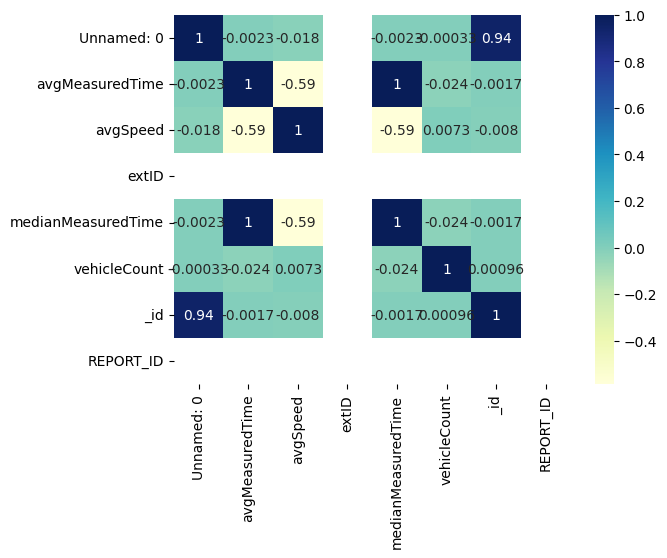

In [ ]:

df.corr()
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()


In [ ]:
df.drop(columns=['extID','REPORT_ID','_id','Unnamed: 0','status','medianMeasuredTime'],inplace=True)
df.head()

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount
0,114,79,2014-02-13T11:30:00,5
1,114,79,2014-02-13T11:35:00,2
2,114,79,2014-02-13T11:40:00,0
3,125,72,2014-02-13T11:45:00,4
4,123,73,2014-02-13T11:50:00,5


In [ ]:
# Split string column into two new columns
df[['date', 'Time']] = df.TIMESTAMP.str.split("T", expand = True)
df


,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,date,Time
0,114,79,2014-02-13T11:30:00,5,2014-02-13,11:30:00
1,114,79,2014-02-13T11:35:00,2,2014-02-13,11:35:00
2,114,79,2014-02-13T11:40:00,0,2014-02-13,11:40:00
3,125,72,2014-02-13T11:45:00,4,2014-02-13,11:45:00
4,123,73,2014-02-13T11:50:00,5,2014-02-13,11:50:00
...,...,...,...,...,...,...
53920,121,74,2014-11-13T10:20:00,0,2014-11-13,10:20:00
53921,121,74,2014-11-13T10:25:00,0,2014-11-13,10:25:00
53922,121,74,2014-11-13T10:30:00,0,2014-11-13,10:30:00
53923,121,74,2014-11-13T10:35:00,0,2014-11-13,10:35:00


In [ ]:
df[['hour', 'min','sec']] = df.Time.str.split(":", expand = True)
df

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,date,Time,hour,min,sec
0,114,79,2014-02-13T11:30:00,5,2014-02-13,11:30:00,11,30,00
1,114,79,2014-02-13T11:35:00,2,2014-02-13,11:35:00,11,35,00
2,114,79,2014-02-13T11:40:00,0,2014-02-13,11:40:00,11,40,00
3,125,72,2014-02-13T11:45:00,4,2014-02-13,11:45:00,11,45,00
4,123,73,2014-02-13T11:50:00,5,2014-02-13,11:50:00,11,50,00
...,...,...,...,...,...,...,...,...,...
53920,121,74,2014-11-13T10:20:00,0,2014-11-13,10:20:00,10,20,00
53921,121,74,2014-11-13T10:25:00,0,2014-11-13,10:25:00,10,25,00
53922,121,74,2014-11-13T10:30:00,0,2014-11-13,10:30:00,10,30,00
53923,121,74,2014-11-13T10:35:00,0,2014-11-13,10:35:00,10,35,00


In [ ]:
df[['year', 'month','day']] = df.date.str.split("-", expand = True)

In [ ]:
df['hour']=df['hour'].astype(int)
df['min']=df['min'].astype(int)
df['sec']=df['sec'].astype(int)
df['year']=df['year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)
df.drop(columns=['date','Time'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53925 entries, 0 to 53924
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   avgMeasuredTime  53925 non-null  int64 
 1   avgSpeed         53925 non-null  int64 
 2   TIMESTAMP        53925 non-null  object
 3   vehicleCount     53925 non-null  int64 
 4   hour             53925 non-null  int64 
 5   min              53925 non-null  int64 
 6   sec              53925 non-null  int64 
 7   year             53925 non-null  int64 
 8   month            53925 non-null  int64 
 9   day              53925 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 4.1+ MB


In [ ]:
df.drop(columns=['sec','year','min'],inplace=True)

In [ ]:
df3 = pd.DataFrame(columns=df.columns)
#from 5min to 1hour
for m in df['month'].unique():
    for d in df['day'].unique():
        for h in df['hour'].unique():
            DDD=df[(df['hour'] == h)&(df['day'] == d)&(df['month'] == m)]
            if DDD['avgSpeed'].mean() > 0:
                #print([[DDD['avgMeasuredTime'].mean(),DDD['avgSpeed'].mean(),DDD['vehicleCount'].sum(),DDD['M'].mean(),DDD['D'].mean(),DDD['H'].mean()]])
                df4=pd.DataFrame([[DDD['avgMeasuredTime'].mean(),DDD['avgSpeed'].mean(),DDD['TIMESTAMP'].values[0],
                                   DDD['vehicleCount'].sum(),DDD['month'].mean(),DDD['day'].mean(),DDD['hour'].mean()]],
                                     columns=['avgMeasuredTime','avgSpeed','TIMESTAMP','vehicleCount','month','day','hour'])
                df3=pd.concat([df3,df4],ignore_index=True)

#extract datetime from timestamp
date_time = pd.to_datetime(df3.pop('TIMESTAMP'), format='%Y-%m-%dT%H:%M:%S')

In [ ]:
df=df3
df

,avgMeasuredTime,avgSpeed,vehicleCount,hour,month,day
0,116.666667,77.166667,16,11.0,2.0,13.0
1,114.750000,78.166667,21,12.0,2.0,13.0
2,112.416667,80.000000,28,13.0,2.0,13.0
3,118.916667,75.583333,16,14.0,2.0,13.0
4,129.166667,69.250000,8,15.0,2.0,13.0
...,...,...,...,...,...,...
4887,109.000000,82.333333,26,7.0,11.0,12.0
4888,111.500000,80.833333,21,8.0,11.0,12.0
4889,117.454545,76.818182,9,9.0,11.0,12.0
4890,112.250000,80.416667,21,10.0,11.0,12.0


<ipython-input-15-b9cd4e7a9203>:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot( 'x','y', data=df1, color='skyblue')


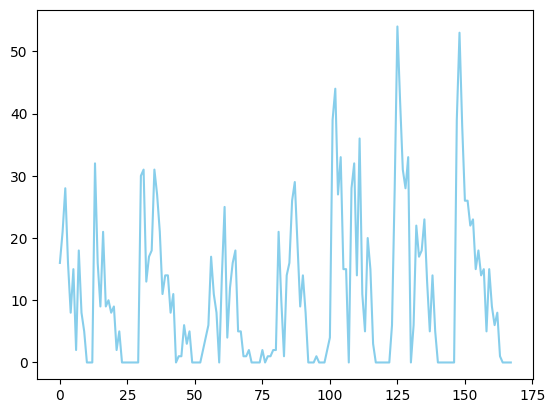

In [ ]:
df1=pd.DataFrame({'x':range(168-0), 'y':np.array(df['vehicleCount'])[0:168] })

# Draw plot
plt.plot( 'x','y', data=df1, color='skyblue')
plt.show()



<ipython-input-16-af6c0056e580>:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot( 'x','y', data=df1, color='skyblue')


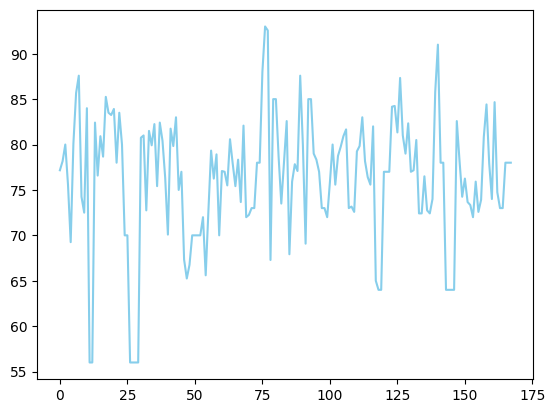

In [ ]:
df1=pd.DataFrame({'x':range(168-0), 'y':np.array(df['avgSpeed'])[0:168] })

# Draw plot
plt.plot( 'x','y', data=df1, color='skyblue')
plt.show()


In [ ]:
#date_time = pd.to_datetime(df.pop('TIMESTAMP'),format='%Y-%m-%dT%H:%M:%S')
timestamp_s = date_time.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
#df['Weekday'] = [datetime.weekday(date) for date in date_time]
#df["IsWeekend"] = df["Weekday"] >= 5

df.head()
timestamp_s

0       1.392291e+09
1       1.392293e+09
2       1.392296e+09
3       1.392300e+09
4       1.392304e+09
            ...     
4887    1.415776e+09
4888    1.415779e+09
4889    1.415783e+09
4890    1.415786e+09
4891    1.415750e+09
Name: TIMESTAMP, Length: 4892, dtype: float64

In [ ]:
mean = df.mean()
std = df.std()
df = (df - mean) / std
df.head()

,avgMeasuredTime,avgSpeed,vehicleCount,hour,month,day,Day sin,Day cos,Year sin,Year cos
0,0.013345,-0.196978,0.289877,-0.047851,-1.524139,-0.253196,0.166112,-1.370071,0.757774,1.777297
1,-0.064719,-0.067845,0.679437,0.099188,-1.524139,-0.253196,-0.018275,-1.382190,0.758080,1.776803
2,-0.159754,0.168898,1.224822,0.246227,-1.524139,-0.253196,-0.383893,-1.333922,0.758692,1.775813
3,0.104986,-0.401437,0.289877,0.393265,-1.524139,-0.253196,-0.724595,-1.192405,0.759303,1.774823
4,0.522460,-1.219277,-0.33342,0.540304,-1.524139,-0.253196,-1.017163,-0.967285,0.759914,1.773832


Text(0.5, 1.0, 'comparaison entre datetime(heure) et')

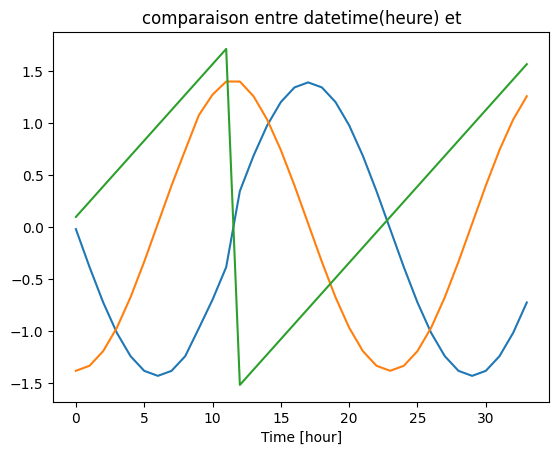

In [ ]:
#affichage de 24 h
#1h -> 12 rows
plt.plot(np.array(df['Day sin'])[14:48], label='Day sin')
plt.plot(np.array(df['Day cos'])[14:48], label='Day cos')
plt.plot(np.array(df['hour'])[14:48], label='hour')
plt.xlabel('Time [hour]')
plt.title('comparaison entre datetime(heure) et')

In [ ]:
df

,avgMeasuredTime,avgSpeed,vehicleCount,hour,month,day,Day sin,Day cos,Year sin,Year cos
0,0.013345,-0.196978,0.289877,-0.047851,-1.524139,-0.253196,0.166112,-1.370071,0.757774,1.777297
1,-0.064719,-0.067845,0.679437,0.099188,-1.524139,-0.253196,-0.018275,-1.382190,0.758080,1.776803
2,-0.159754,0.168898,1.224822,0.246227,-1.524139,-0.253196,-0.383893,-1.333922,0.758692,1.775813
3,0.104986,-0.401437,0.289877,0.393265,-1.524139,-0.253196,-0.724595,-1.192405,0.759303,1.774823
4,0.522460,-1.219277,-0.33342,0.540304,-1.524139,-0.253196,-1.017163,-0.967285,0.759914,1.773832
...,...,...,...,...,...,...,...,...,...,...
4887,-0.298912,0.470207,1.068998,-0.636005,1.606478,-0.365636,1.346232,-0.332251,-0.925845,1.632280
4888,-0.197089,0.276508,0.679437,-0.488967,1.606478,-0.365636,1.205108,-0.673903,-0.925293,1.633369
4889,0.045435,-0.241978,-0.255508,-0.341928,1.606478,-0.365636,0.980613,-0.967285,-0.924741,1.634457
4890,-0.166542,0.222703,0.679437,-0.194889,1.606478,-0.365636,0.688046,-1.192405,-0.924188,1.635544


In [ ]:
df.drop(columns=['hour','month','day'],inplace=True)

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

**Data** **windowing**

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=24,shift=8,
                     label_columns=['avgSpeed'])
w1.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 24, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None, 24, 1), dtype=tf.float32, name=None))>

In [ ]:
def plot(self, model=None, plot_col='avgSpeed', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  print(plot_col_index)
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [1h]')

WindowGenerator.plot = plot


In [ ]:


def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='hour')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,)
                      ##callbacks=[early_stopping])
  return history

BASELINE

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['avgSpeed'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['avgSpeed']

In [ ]:
baseline = Baseline(label_index=column_indices['avgSpeed'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

31/31 [==============================] - 0s 4ms/step - loss: 1.0582 - mean_absolute_error: 0.6981


In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=8,
    label_columns=['avgSpeed'])

wide_window

Total window size: 32
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Label column name(s): ['avgSpeed']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 7)
Output shape: (32, 24, 1)


1


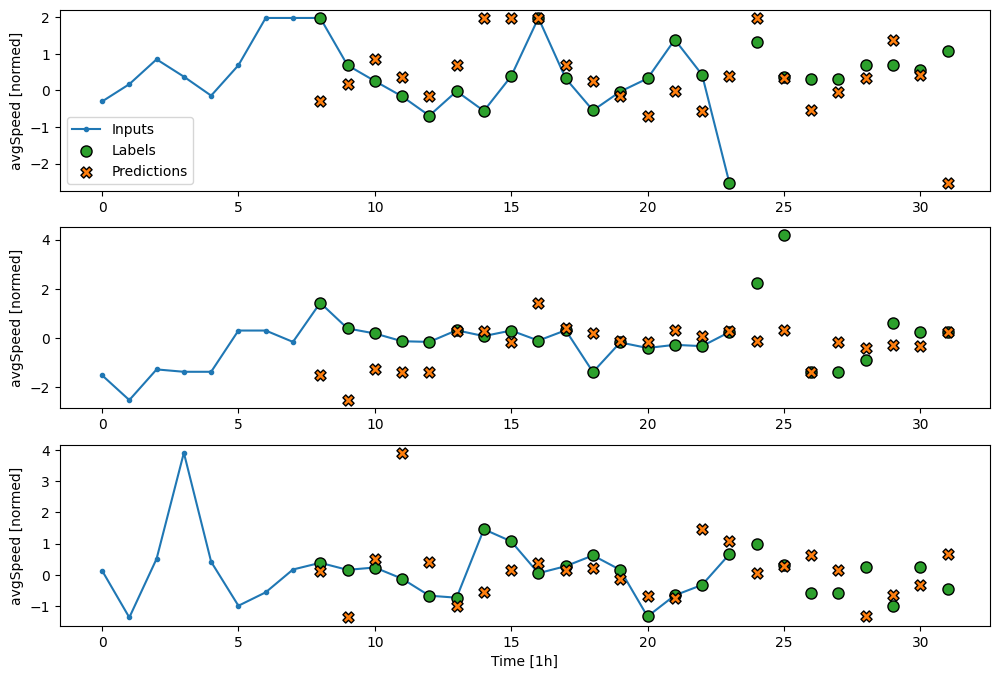

In [ ]:
wide_window.plot(baseline)

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 7)
Output shape: (32, 1, 1)


In [ ]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,)
                      ##callbacks=[early_stopping])
  return history

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
107/107 [==============================] - 3s 7ms/step - loss: 1.4534 - mean_absolute_error: 0.9030 - val_loss: 1.1436 - val_mean_absolute_error: 0.8214
Epoch 2/100
107/107 [==============================] - 1s 6ms/step - loss: 1.2545 - mean_absolute_error: 0.8113 - val_loss: 1.0001 - val_mean_absolute_error: 0.7560
Epoch 3/100
107/107 [==============================] - 1s 6ms/step - loss: 1.1397 - mean_absolute_error: 0.7570 - val_loss: 0.9174 - val_mean_absolute_error: 0.7159
Epoch 4/100
107/107 [==============================] - 1s 6ms/step - loss: 1.0689 - mean_absolute_error: 0.7245 - val_loss: 0.8683 - val_mean_absolute_error: 0.6898
Epoch 5/100
107/107 [==============================] - 1s 6ms/step - loss: 1.0206 - mean_absolute_error: 0.7017 - val_loss: 0.8349 - val_mean_absolute_error: 0.6712
Epoch 6/100
107/107 [==============================] - 1s 6ms/step - loss: 0.9858 - mean_absolute_error: 0.6846 - val_loss: 0.8115 - val_mean_absolute_error: 0.6574
Epoch 7/10

1


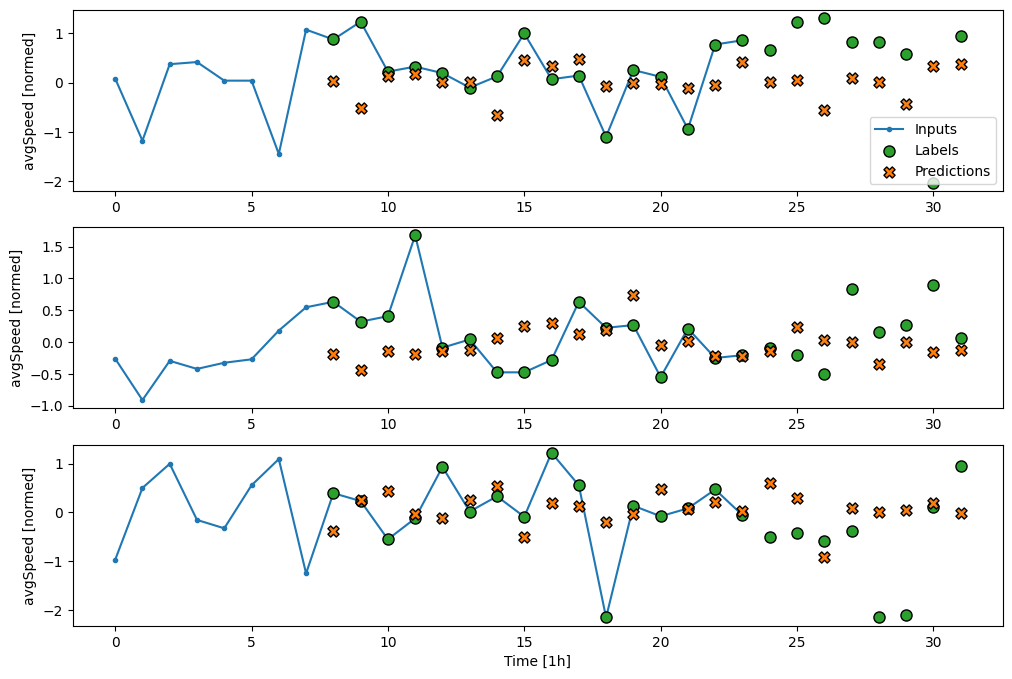

In [ ]:
wide_window.plot(linear)

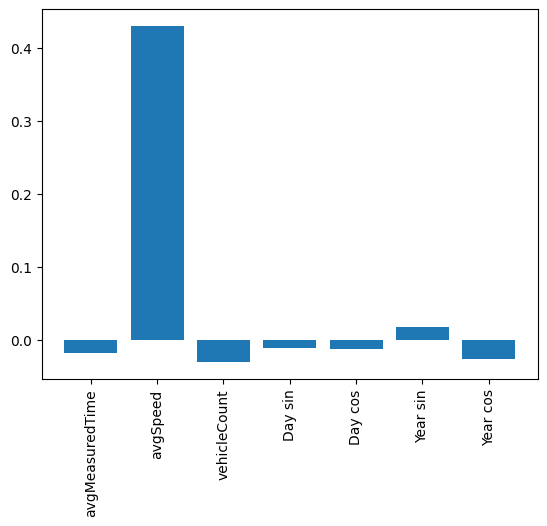

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, wide_window)

val_performance['Dense'] = dense.evaluate(wide_window.val)
performance['Dense'] = dense.evaluate(wide_window.test, verbose=0)

Epoch 1/100
107/107 [==============================] - 2s 9ms/step - loss: 1.0199 - mean_absolute_error: 0.6715 - val_loss: 0.9027 - val_mean_absolute_error: 0.6541
Epoch 2/100
107/107 [==============================] - 1s 7ms/step - loss: 0.9921 - mean_absolute_error: 0.6630 - val_loss: 0.9051 - val_mean_absolute_error: 0.6560
Epoch 3/100
107/107 [==============================] - 1s 10ms/step - loss: 0.9801 - mean_absolute_error: 0.6594 - val_loss: 0.9148 - val_mean_absolute_error: 0.6604
Epoch 4/100
107/107 [==============================] - 1s 12ms/step - loss: 0.9701 - mean_absolute_error: 0.6562 - val_loss: 0.9164 - val_mean_absolute_error: 0.6688
Epoch 5/100
107/107 [==============================] - 1s 13ms/step - loss: 0.9654 - mean_absolute_error: 0.6567 - val_loss: 0.9275 - val_mean_absolute_error: 0.6693
Epoch 6/100
107/107 [==============================] - 1s 8ms/step - loss: 0.9528 - mean_absolute_error: 0.6527 - val_loss: 0.9603 - val_mean_absolute_error: 0.6877
Epoch 7

1


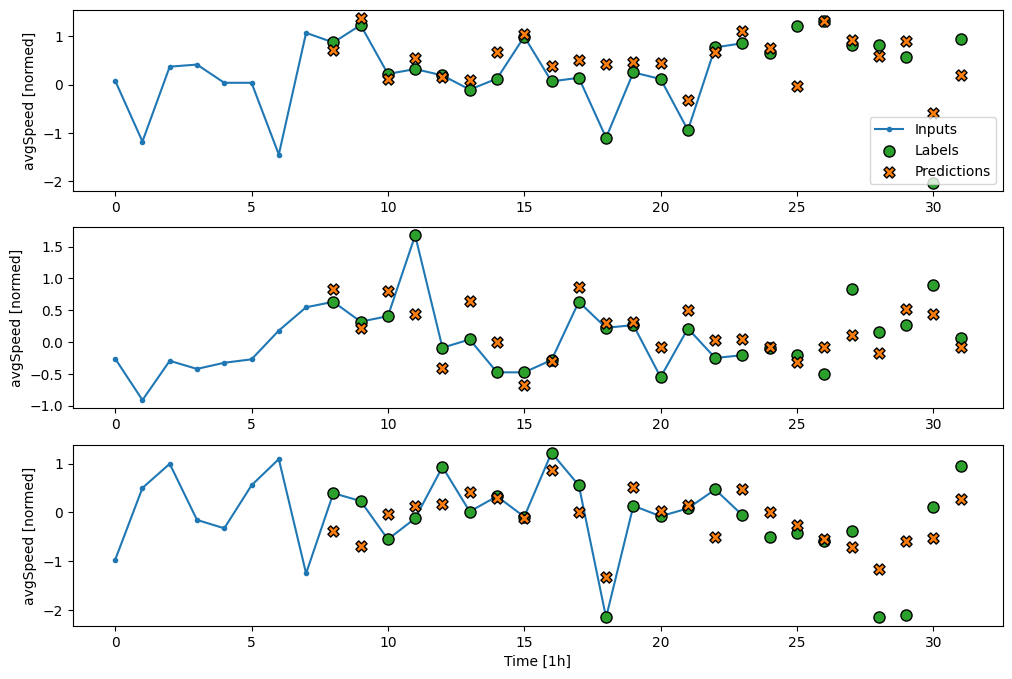

In [ ]:
wide_window.plot(dense)

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['vehicleCount'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['vehicleCount']

2


Text(0.5, 1.0, 'Given 15min  of inputs, predict 5min into the future.')

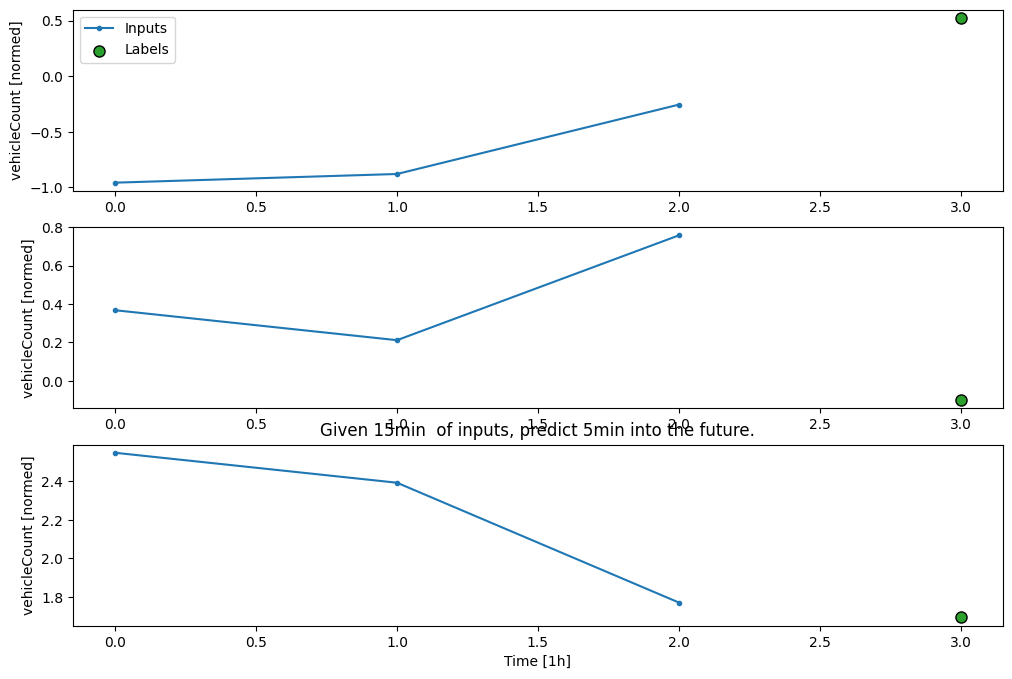

In [ ]:
conv_window.plot(plot_col="vehicleCount")
plt.title("Given 15min  of inputs, predict 5min into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 7)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)


Epoch 1/100
107/107 [==============================] - 2s 10ms/step - loss: 0.6383 - mean_absolute_error: 0.5672 - val_loss: 0.5317 - val_mean_absolute_error: 0.5560
Epoch 2/100
107/107 [==============================] - 1s 11ms/step - loss: 0.4363 - mean_absolute_error: 0.4719 - val_loss: 0.4408 - val_mean_absolute_error: 0.4936
Epoch 3/100
107/107 [==============================] - 1s 8ms/step - loss: 0.3966 - mean_absolute_error: 0.4523 - val_loss: 0.4159 - val_mean_absolute_error: 0.4764
Epoch 4/100
107/107 [==============================] - 1s 6ms/step - loss: 0.3782 - mean_absolute_error: 0.4401 - val_loss: 0.3996 - val_mean_absolute_error: 0.4612
Epoch 5/100
107/107 [==============================] - 1s 6ms/step - loss: 0.3653 - mean_absolute_error: 0.4327 - val_loss: 0.3877 - val_mean_absolute_error: 0.4614
Epoch 6/100
107/107 [==============================] - 1s 7ms/step - loss: 0.3561 - mean_absolute_error: 0.4276 - val_loss: 0.3838 - val_mean_absolute_error: 0.4606
Epoch 7/

In [ ]:
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

31/31 [==============================] - 0s 4ms/step - loss: 0.3751 - mean_absolute_error: 0.4422


1


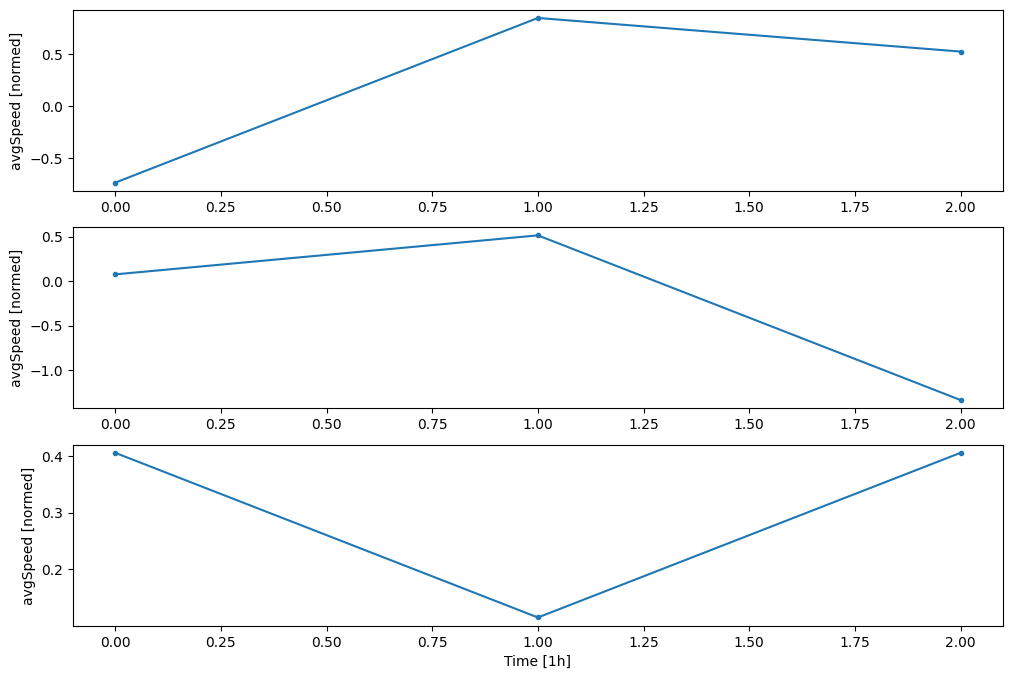

In [ ]:
conv_window.plot(multi_step_dense)

cnn

In [ ]:
CONV_WIDTH=3

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['vehicleCount'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['vehicleCount']

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
df.columns

Index(['avgMeasuredTime', 'avgSpeed', 'vehicleCount', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')

In [ ]:
history = compile_and_fit(conv_model, conv_window)

Epoch 1/100
107/107 [==============================] - 8s 16ms/step - loss: 0.5049 - mean_absolute_error: 0.5149 - val_loss: 0.4402 - val_mean_absolute_error: 0.4723
Epoch 2/100
107/107 [==============================] - 1s 11ms/step - loss: 0.4047 - mean_absolute_error: 0.4549 - val_loss: 0.4081 - val_mean_absolute_error: 0.4485
Epoch 3/100
107/107 [==============================] - 1s 9ms/step - loss: 0.3792 - mean_absolute_error: 0.4405 - val_loss: 0.3810 - val_mean_absolute_error: 0.4354
Epoch 4/100
107/107 [==============================] - 1s 7ms/step - loss: 0.3672 - mean_absolute_error: 0.4317 - val_loss: 0.3604 - val_mean_absolute_error: 0.4282
Epoch 5/100
107/107 [==============================] - 1s 8ms/step - loss: 0.3531 - mean_absolute_error: 0.4245 - val_loss: 0.3461 - val_mean_absolute_error: 0.4215
Epoch 6/100
107/107 [==============================] - 1s 6ms/step - loss: 0.3449 - mean_absolute_error: 0.4167 - val_loss: 0.3443 - val_mean_absolute_error: 0.4179
Epoch 7/

In [ ]:
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

31/31 [==============================] - 0s 4ms/step - loss: 0.3654 - mean_absolute_error: 0.4168


1


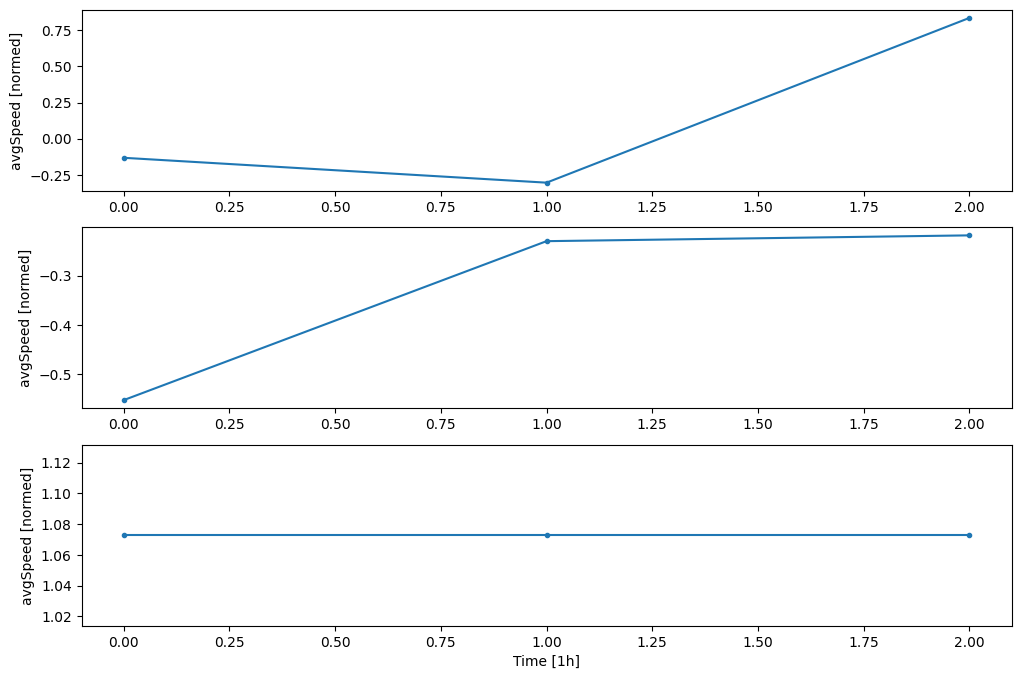

In [ ]:
conv_window.plot(conv_model,plot_col="avgSpeed")

In [ ]:
CONV_WIDTH=1
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=8,
    label_columns=['avgSpeed'])

wide_conv_window

Total window size: 32
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Label column name(s): ['avgSpeed']

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `wide_conv_window`")
print('Input shape:', wide_conv_window.example[0].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Conv model on `wide_conv_window`
Input shape: (32, 24, 7)
Output shape: (32, 24, 1)


In [ ]:
history = compile_and_fit(conv_model, wide_conv_window)

Epoch 1/100
107/107 [==============================] - 2s 11ms/step - loss: 1.0457 - mean_absolute_error: 0.6771 - val_loss: 0.8598 - val_mean_absolute_error: 0.6314
Epoch 2/100
107/107 [==============================] - 1s 7ms/step - loss: 1.0019 - mean_absolute_error: 0.6630 - val_loss: 0.8585 - val_mean_absolute_error: 0.6307
Epoch 3/100
107/107 [==============================] - 1s 7ms/step - loss: 0.9898 - mean_absolute_error: 0.6601 - val_loss: 0.8600 - val_mean_absolute_error: 0.6346
Epoch 4/100
107/107 [==============================] - 1s 13ms/step - loss: 0.9816 - mean_absolute_error: 0.6591 - val_loss: 0.8621 - val_mean_absolute_error: 0.6362
Epoch 5/100
107/107 [==============================] - 1s 9ms/step - loss: 0.9752 - mean_absolute_error: 0.6578 - val_loss: 0.8631 - val_mean_absolute_error: 0.6375
Epoch 6/100
107/107 [==============================] - 1s 7ms/step - loss: 0.9692 - mean_absolute_error: 0.6566 - val_loss: 0.8648 - val_mean_absolute_error: 0.6363
Epoch 7/

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 24, 7)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


1


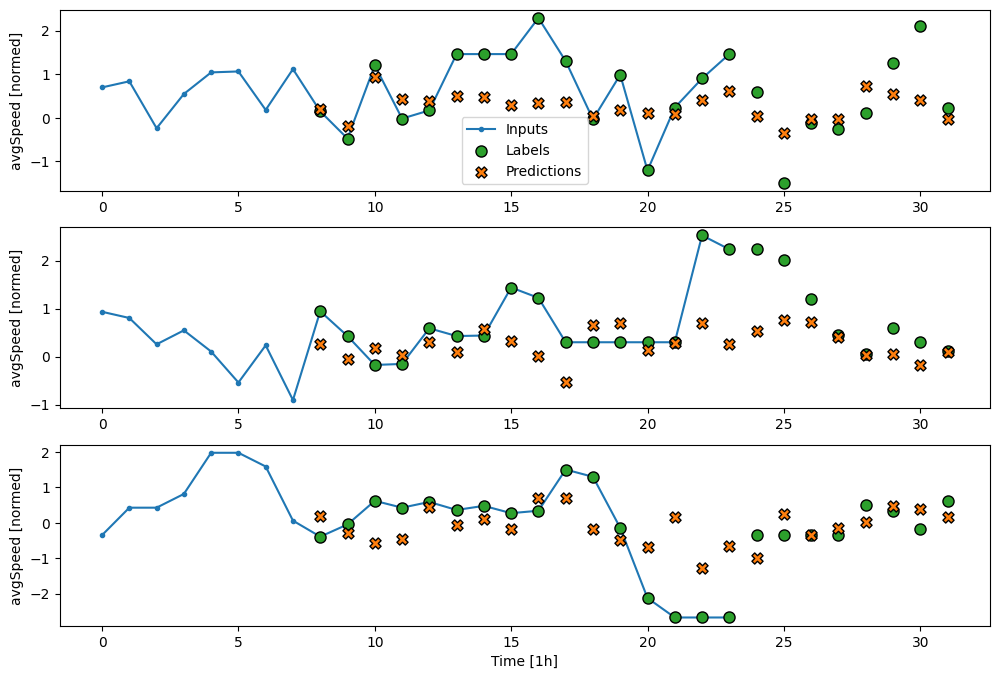

In [ ]:
wide_conv_window.plot(conv_model,plot_col="avgSpeed")

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
GRU =  tf.keras.models.Sequential([
# First GRU layer with Dropout regularisation
      tf.keras.layers.GRU(32, return_sequences=True),
      tf.keras.layers.Dense(units=1)
    ])


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
107/107 [==============================] - 6s 18ms/step - loss: 1.0289 - mean_absolute_error: 0.6736 - val_loss: 0.8626 - val_mean_absolute_error: 0.6340
Epoch 2/100
107/107 [==============================] - 1s 10ms/step - loss: 1.0038 - mean_absolute_error: 0.6666 - val_loss: 0.8715 - val_mean_absolute_error: 0.6409
Epoch 3/100
107/107 [==============================] - 1s 10ms/step - loss: 0.9833 - mean_absolute_error: 0.6615 - val_loss: 0.8769 - val_mean_absolute_error: 0.6429
Epoch 4/100
107/107 [==============================] - 1s 8ms/step - loss: 0.9597 - mean_absolute_error: 0.6564 - val_loss: 0.8833 - val_mean_absolute_error: 0.6461
Epoch 5/100
107/107 [==============================] - 1s 8ms/step - loss: 0.9364 - mean_absolute_error: 0.6520 - val_loss: 0.8938 - val_mean_absolute_error: 0.6524
Epoch 6/100
107/107 [==============================] - 1s 8ms/step - loss: 0.9202 - mean_absolute_error: 0.6488 - val_loss: 0.8920 - val_mean_absolute_error: 0.6508
Epoch 7

1


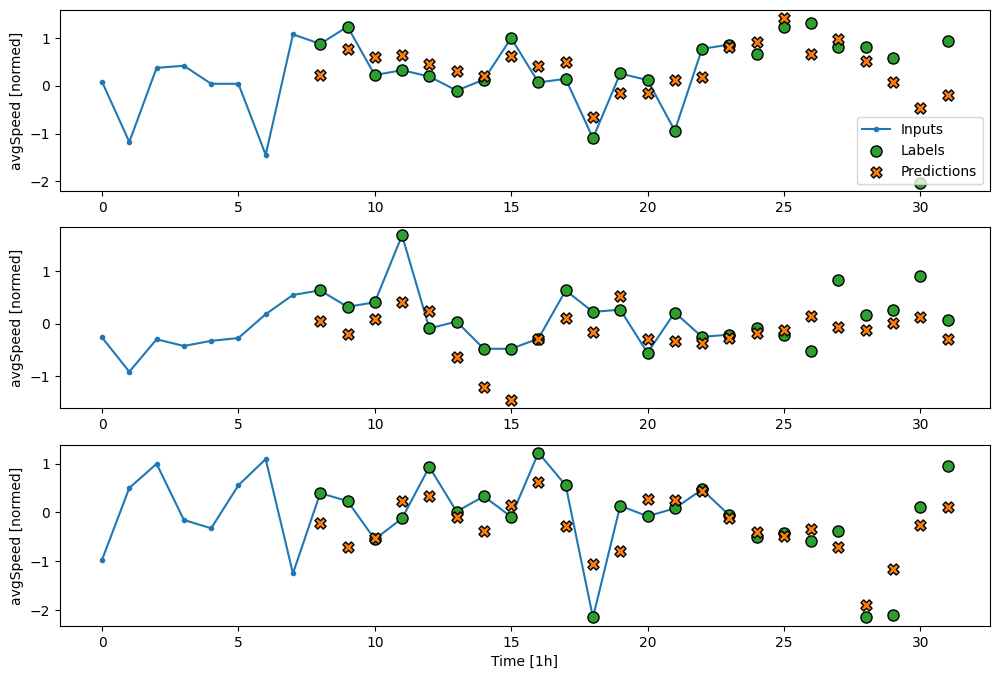

In [ ]:
wide_window.plot(lstm_model)

In [ ]:
history = compile_and_fit(GRU, wide_window)

Epoch 1/100
107/107 [==============================] - 5s 19ms/step - loss: 1.0289 - mean_absolute_error: 0.6735 - val_loss: 0.8556 - val_mean_absolute_error: 0.6340
Epoch 2/100
107/107 [==============================] - 2s 15ms/step - loss: 1.0062 - mean_absolute_error: 0.6674 - val_loss: 0.8683 - val_mean_absolute_error: 0.6392
Epoch 3/100
107/107 [==============================] - 1s 8ms/step - loss: 0.9928 - mean_absolute_error: 0.6646 - val_loss: 0.8825 - val_mean_absolute_error: 0.6476
Epoch 4/100
107/107 [==============================] - 1s 8ms/step - loss: 0.9820 - mean_absolute_error: 0.6627 - val_loss: 0.8979 - val_mean_absolute_error: 0.6559
Epoch 5/100
107/107 [==============================] - 1s 8ms/step - loss: 0.9696 - mean_absolute_error: 0.6600 - val_loss: 0.9047 - val_mean_absolute_error: 0.6564
Epoch 6/100
107/107 [==============================] - 1s 8ms/step - loss: 0.9582 - mean_absolute_error: 0.6575 - val_loss: 0.9180 - val_mean_absolute_error: 0.6698
Epoch 7/

1


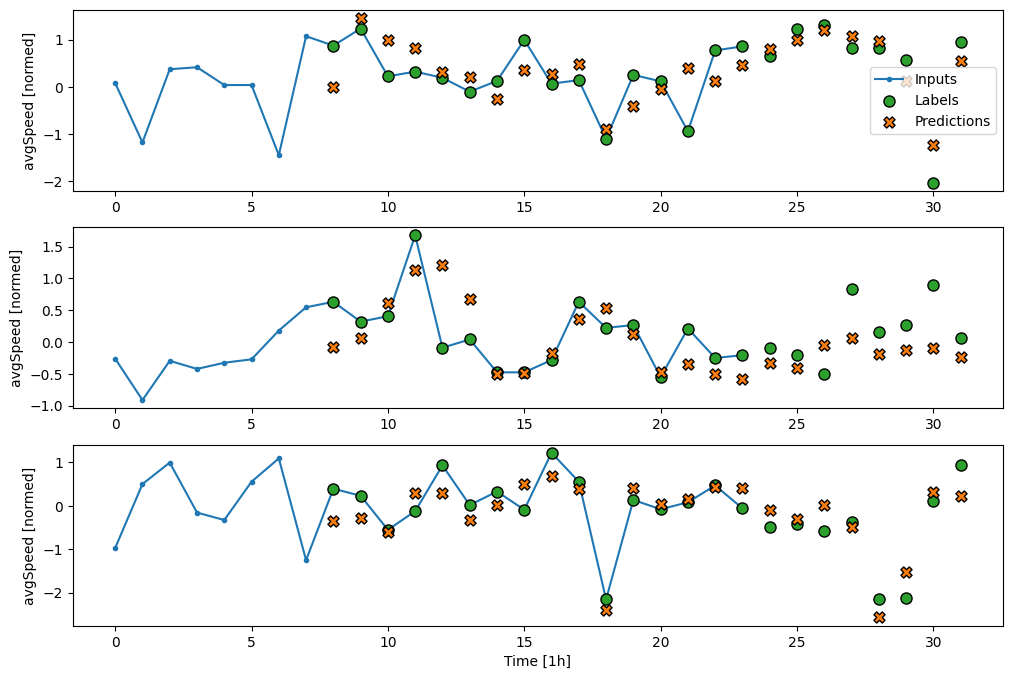

In [ ]:
wide_window.plot(GRU)

In [ ]:
ConvLSTM_model = tf.keras.models.Sequential([
tf.keras.layers.Reshape((1,24,7)),
tf.keras.layers.ConvLSTM1D(filters=64, kernel_size=(1), input_shape=(1,24,7)),
tf.keras.layers.Dense(units=24),
tf.keras.layers.Dense(units=6),
tf.keras.layers.Dense(units=1)])

history = compile_and_fit(ConvLSTM_model, wide_window)

val_performance['ConvLSTM1D'] = ConvLSTM_model.evaluate(wide_window.val)

performance['ConvLSTM1D'] = ConvLSTM_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
107/107 [==============================] - 7s 23ms/step - loss: 1.0378 - mean_absolute_error: 0.6732 - val_loss: 0.8667 - val_mean_absolute_error: 0.6388
Epoch 2/100
107/107 [==============================] - 3s 27ms/step - loss: 1.0235 - mean_absolute_error: 0.6703 - val_loss: 0.8971 - val_mean_absolute_error: 0.6595
Epoch 3/100
107/107 [==============================] - 3s 23ms/step - loss: 1.0186 - mean_absolute_error: 0.6704 - val_loss: 0.8974 - val_mean_absolute_error: 0.6593
Epoch 4/100
107/107 [==============================] - 2s 18ms/step - loss: 1.0154 - mean_absolute_error: 0.6697 - val_loss: 0.8953 - val_mean_absolute_error: 0.6525
Epoch 5/100
107/107 [==============================] - 2s 18ms/step - loss: 1.0143 - mean_absolute_error: 0.6694 - val_loss: 0.8975 - val_mean_absolute_error: 0.6561
Epoch 6/100
107/107 [==============================] - 2s 19ms/step - loss: 1.0170 - mean_absolute_error: 0.6723 - val_loss: 0.9013 - val_mean_absolute_error: 0.6547
Epoc

1


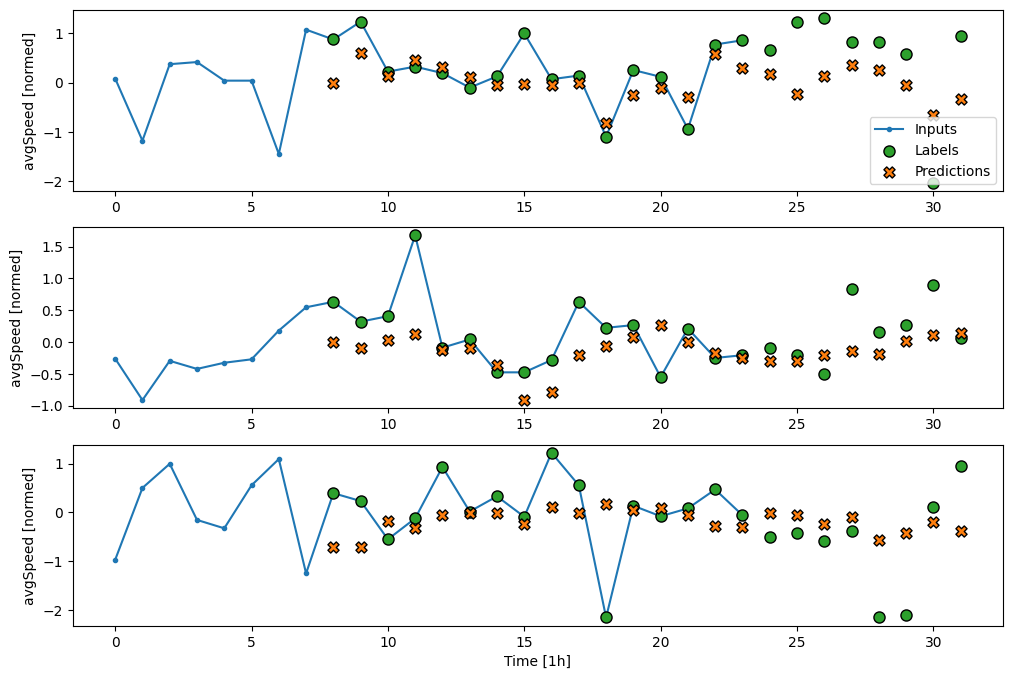

In [ ]:
wide_window.plot(ConvLSTM_model)

In [ ]:
Dlstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(24),
    tf.keras.layers.Dense(16),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=6),
    tf.keras.layers.Dense(units=1)])

In [ ]:
history = compile_and_fit(Dlstm_model, wide_window)

val_performance['Dlstm_model'] = Dlstm_model.evaluate(wide_window.val)

performance['Dlstm_model'] = Dlstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
107/107 [==============================] - 6s 21ms/step - loss: 1.0401 - mean_absolute_error: 0.6808 - val_loss: 0.8699 - val_mean_absolute_error: 0.6411
Epoch 2/100
107/107 [==============================] - 2s 16ms/step - loss: 0.9972 - mean_absolute_error: 0.6647 - val_loss: 0.8906 - val_mean_absolute_error: 0.6498
Epoch 3/100
107/107 [==============================] - 1s 12ms/step - loss: 0.9720 - mean_absolute_error: 0.6614 - val_loss: 0.9276 - val_mean_absolute_error: 0.6658
Epoch 4/100
107/107 [==============================] - 1s 10ms/step - loss: 0.9399 - mean_absolute_error: 0.6542 - val_loss: 0.9850 - val_mean_absolute_error: 0.6877
Epoch 5/100
107/107 [==============================] - 1s 11ms/step - loss: 0.8993 - mean_absolute_error: 0.6445 - val_loss: 0.9695 - val_mean_absolute_error: 0.6820
Epoch 6/100
107/107 [==============================] - 1s 10ms/step - loss: 0.8491 - mean_absolute_error: 0.6311 - val_loss: 1.0105 - val_mean_absolute_error: 0.7012
Epoc

1


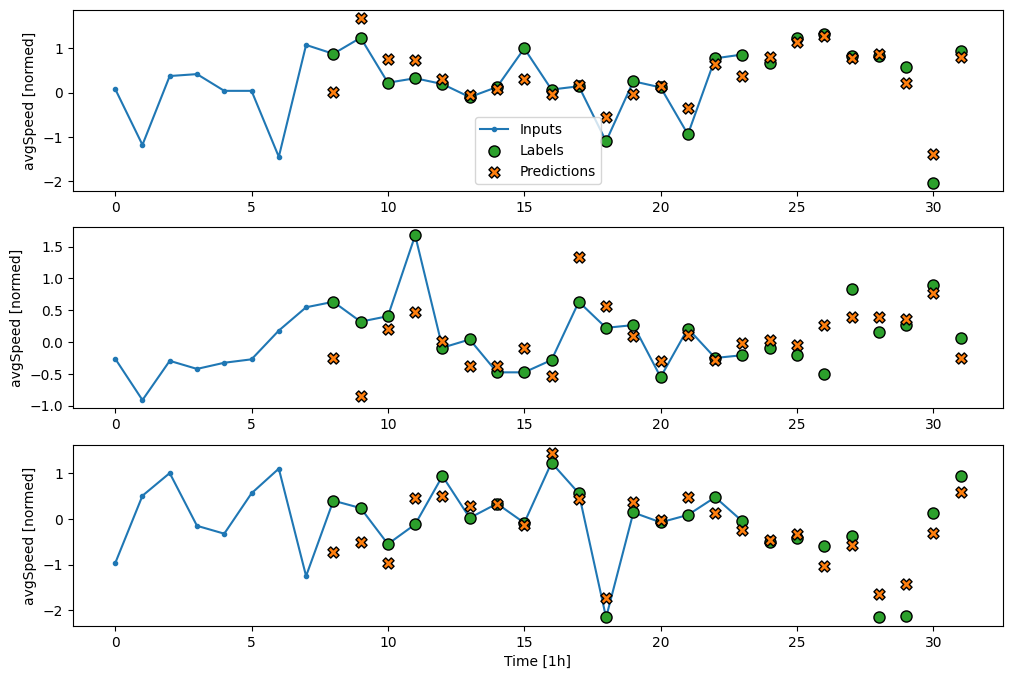

In [ ]:
wide_window.plot(Dlstm_model)